In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression


In [3]:
STORAGE_PATH = "../../persisted_data/feather/{}.feather"

def load_data_set(name):
    data = pd.read_feather(STORAGE_PATH.format(name))
    return data

In [4]:
all_stocks_sets = {
    # future interval: data set
    10: load_data_set("all_stocks_20spy_10shift_normalized"),
    20: load_data_set("all_stocks_20spy_20shift_normalized"),
    50: load_data_set("all_stocks_20spy_50shift_normalized"),
    100: load_data_set("all_stocks_20spy_100shift_normalized")
}


In [6]:
# choose a data set
samples = all_stocks_sets[100]

# calculate the correlations for a data set
correlations = samples.corrwith(np.log(samples["future_price"]))

# filter out the future columns
future_columns = [column for column in samples if "future" in column]
correlations.drop(future_columns, inplace=True)
correlations.drop("current_price", inplace=True)
correlations.drop("index", inplace=True)

# show the correlations
pd.set_option("display.max_rows", None)
pd.options.display.float_format = '{:,.3f}'.format
pd.DataFrame(correlations.sort_values(key=pd.Series.abs, ascending=False))

,0
horizontal_position200,0.059
horizontal_lower20,0.054
ma_trend50_200,0.048
macd_signal50_200,0.044
horizontal_position100,0.042
chande100,0.042
rate_of_change20,-0.041
macd50_200,0.041
rate_of_change100,-0.038
horizontal_lower50,0.035


In [7]:
def plot_correlations(interval, correlations, plot_columns=2):
    number_of_indicators = len(correlations)
    fig, axs = plt.subplots(number_of_indicators // plot_columns + number_of_indicators % plot_columns, plot_columns, figsize=(30,60))
    fig.text(0.5, 0.04, "prediction interval", ha="center")
    fig.text(0.04, 0.5, "correlation", va="center", rotation="vertical")
    for index, indicator in enumerate(correlations):
        axs[index // plot_columns][index % plot_columns].title.set_text(indicator)
        axs[index // plot_columns][index % plot_columns].plot(intervals, correlations[indicator])
    
    plt.subplots_adjust(top=5)
    plt.show()

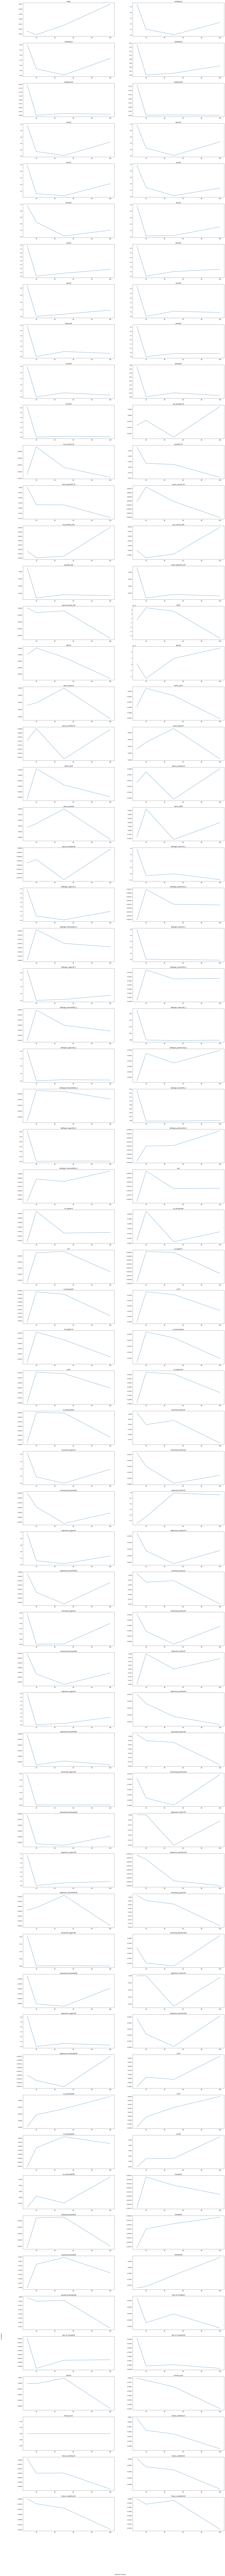

In [14]:

def analyze_indicator_correlation(sample_sets, future_indicator):
    correlations = dict.fromkeys(list(sample_sets.values())[0], np.array([]))
    for interval in sample_sets:
        future = sample_sets[interval][future_indicator]
        for feature_name, feature_values in sample_sets[interval].iteritems():
            corr = feature_values.corr(future)
            correlations[feature_name] = np.append(correlations[feature_name], corr)
    
    return correlations

intervals = list(all_stocks_sets.keys())
correlations = analyze_indicator_correlation(all_stocks_sets, "future_price")
#print(correlations)
#correlations.update((feature, corr) for feature, corr in correlations.items())
#print(correlations)
plot_correlations(intervals, correlations)


In [ ]:
num_feats = 10
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')